In [137]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [138]:
df_full = pd.read_csv('../data/cmsa_baseline.csv')

In [139]:
df_full = df_full.iloc[:,1:].set_index('datetime')

In [140]:
start_train = '2020-09-01 00:00:00'
end_train = '2021-12-01 00:00:00'

In [141]:
df_train = df_full[(df_full.index >= start_train) & (df_full.index < end_train)]

In [142]:
label_encoder = LabelEncoder()
df_train['vacation_dummy'] = label_encoder.fit_transform(df_train['vacation_dummy']).astype('float64')
df_train['holiday_dummy'] = label_encoder.fit_transform(df_train['holiday_dummy']).astype('float64')

/var/folders/3k/f1097l0x5kv5_h73ypy7tnfr0000gn/T/ipykernel_72763/515974365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['vacation_dummy'] = label_encoder.fit_transform(df_train['vacation_dummy']).astype('float64')
/var/folders/3k/f1097l0x5kv5_h73ypy7tnfr0000gn/T/ipykernel_72763/515974365.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['holiday_dummy'] = label_encoder.fit_transform(df_train['holiday_dummy']).astype('float64')


In [143]:
df_train_11 = df_train.drop(columns=['GAWW-12', 'GAWW-14'])
df_train_12 = df_train.drop(columns=['GAWW-11', 'GAWW-14'])
df_train_14 = df_train.drop(columns=['GAWW-11', 'GAWW-12'])

In [144]:
df_train_14

,GAWW-14,vacation_dummy,holiday_dummy,stringency_index
datetime,,,,
2020-09-01 00:00:00,32.0,0.0,0.0,50.93
2020-09-01 00:15:00,30.0,0.0,0.0,50.93
2020-09-01 00:30:00,27.0,0.0,0.0,50.93
2020-09-01 00:45:00,26.0,0.0,0.0,50.93
2020-09-01 01:00:00,43.0,0.0,0.0,50.93
...,...,...,...,...
2021-11-30 22:45:00,15.0,0.0,0.0,56.48
2021-11-30 23:00:00,20.0,0.0,0.0,56.48
2021-11-30 23:15:00,19.0,0.0,0.0,56.48


In [145]:
corr_11 = df_train_11.corr()
corr_12 = df_train_12.corr()
corr_14 = df_train_14.corr()

<AxesSubplot:>

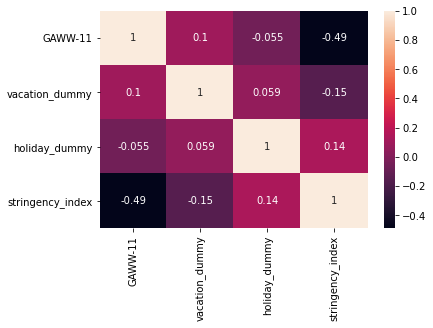

In [155]:
sns.heatmap(corr_11, annot=True)

<AxesSubplot:>

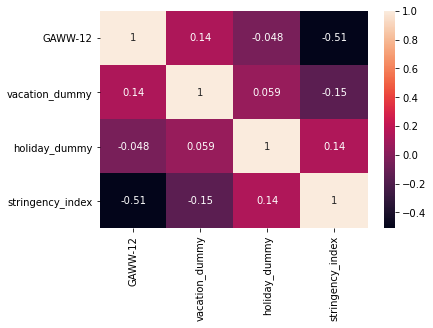

In [156]:
sns.heatmap(corr_12, annot=True)

<AxesSubplot:>

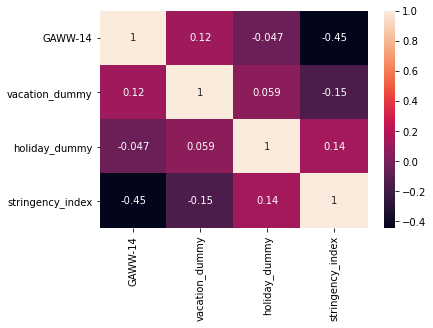

In [154]:
sns.heatmap(corr_14, annot=True)

In [149]:
# remove features that cross correlate -> higher than 0.9
def cross_corr(df, corr):
    columns = np.full((corr.shape[0],), True, dtype=bool)
    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i,j] >= 0.9:
                if columns[j]:
                    columns[j] = False
    selected_columns = df.columns[columns]
    df = df[selected_columns]
    
    return df

In [150]:
# cross_corr(df_train_12, corr_12)